In [3]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip '/content/drive/MyDrive/CelbImage/celebA.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/img_align_celeba/19

In [6]:
# Load the celebA dataset
# Assuming the dataset is located in the directory "celebA_images"
def load_celebA_dataset():
    image_dir = '/content/img_align_celeba'
    images = []

    # Load each image in the dataset
    for i in range(1, 101300):
        filename = f'{image_dir}/img_align_celeba/{str(i).zfill(6)}.jpg'
        image = Image.open(filename)
        image = image.resize((64, 64))  # Resize the image to 64x64
        image = np.array(image)
        images.append(image)

    # Normalize pixel values to the range [0, 1]
    images = np.array(images).astype('float32') / 255.0

    return images
  # Define the inpainting model (U-Net architecture)


In [7]:

def build_inpainting_model():
    inputs = tf.keras.Input(shape=(64, 64, 3))
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same')(conv4)
    up1 = tf.keras.layers.Conv2D(256, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv4))
    merge1 = tf.keras.layers.Concatenate(axis=3)([conv3, up1])
    conv5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(merge1)
    conv5 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv5)
    up2 = tf.keras.layers.Conv2D(128, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv5))
    merge2 = tf.keras.layers.Concatenate(axis=3)([conv2, up2])
    conv6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(merge2)
    conv6 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv6)
    up3 = tf.keras.layers.Conv2D(64, 2, activation='relu', padding='same')(tf.keras.layers.UpSampling2D(size=(2, 2))(conv6))
    merge3 = tf.keras.layers.Concatenate(axis=3)([conv1, up3])
    conv7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(merge3)
    conv7 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv7)
    output = tf.keras.layers.Conv2D(3, 1, activation='sigmoid', padding='same')(conv7)
    model = tf.keras.Model(inputs=inputs, outputs=output)
    return model

# Build the inpainting model
inpainting_model = build_inpainting_model()

# Compile the inpainting model
inpainting_model.compile(optimizer='adam', loss='mse')

# Load and preprocess the celebA dataset
celebA_images = load_celebA_dataset()


Epoch: 0/4000
Epoch: 100/4000
Epoch: 200/4000
Epoch: 300/4000
Epoch: 400/4000
Epoch: 500/4000
Epoch: 600/4000
Epoch: 700/4000
Epoch: 800/4000
Epoch: 900/4000
Epoch: 1000/4000
Epoch: 1100/4000
Epoch: 1200/4000
Epoch: 1300/4000
Epoch: 1400/4000
Epoch: 1500/4000
Epoch: 1600/4000
Epoch: 1700/4000
Epoch: 1800/4000
Epoch: 1900/4000
Epoch: 2000/4000
Epoch: 2100/4000
Epoch: 2200/4000
Epoch: 2300/4000
Epoch: 2400/4000
Epoch: 2500/4000
Epoch: 2600/4000
Epoch: 2700/4000
Epoch: 2800/4000
Epoch: 2900/4000
Epoch: 3000/4000
Epoch: 3100/4000
Epoch: 3200/4000
Epoch: 3300/4000
Epoch: 3400/4000
Epoch: 3500/4000
Epoch: 3600/4000
Epoch: 3700/4000
Epoch: 3800/4000
Epoch: 3900/4000
1/1 [==============================] - 1s 704ms/step


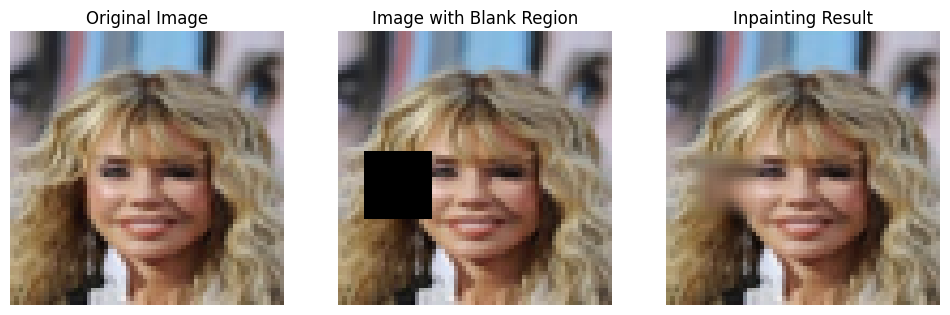

In [8]:

# Training loop
epochs = 4000
batch_size = 128

for epoch in range(epochs):
    # Select a random batch of images
    idx = np.random.randint(0, celebA_images.shape[0], batch_size)
    imgs = celebA_images[idx]

    # Create blank regions for the images
    blank_size = 16
    x = np.random.randint(0, imgs.shape[2] - blank_size)
    y = np.random.randint(0, imgs.shape[1] - blank_size)
    imgs_with_blank = np.copy(imgs)
    imgs_with_blank[:, y:y+blank_size, x:x+blank_size] = 0.0

    # Train the inpainting model
    inpainting_model.train_on_batch(imgs_with_blank, imgs)

    # Print the progress
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}/{epochs}")

# Select a random image from the celebA dataset
random_idx = np.random.randint(0, celebA_images.shape[0])
image = celebA_images[random_idx]

# Create a blank region for the image
blank_size = 16
x = np.random.randint(0, image.shape[1] - blank_size)
y = np.random.randint(0, image.shape[0] - blank_size)
image_with_blank = np.copy(image)
image_with_blank[y:y+blank_size, x:x+blank_size] = 0.0

# Inpaint the image
inpainting_result = inpainting_model.predict(np.expand_dims(image_with_blank, axis=0))[0]

# Plot the original image, image with blank region, and the inpainting result
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(image_with_blank)
axes[1].set_title("Image with Blank Region")
axes[1].axis("off")
axes[2].imshow(inpainting_result)
axes[2].set_title("Inpainting Result")
axes[2].axis("off")
plt.show()


1/1 [==============================] - 0s 19ms/step


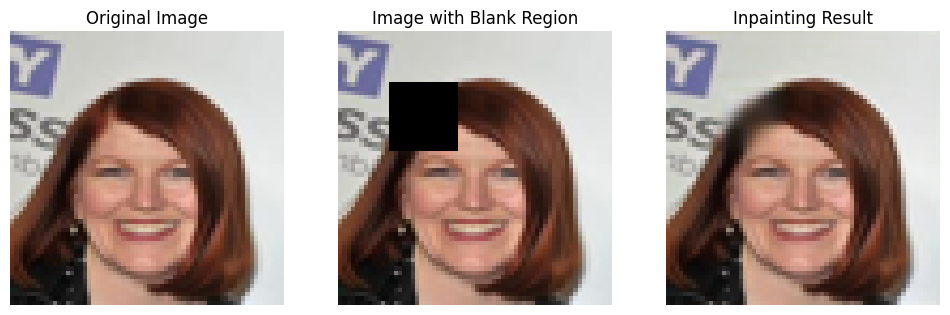

In [9]:
# Select a random image from the celebA dataset
random_idx = np.random.randint(0, celebA_images.shape[0])
image = celebA_images[random_idx]

# Create a blank region for the image
blank_size = 16
x = np.random.randint(0, image.shape[1] - blank_size)
y = np.random.randint(0, image.shape[0] - blank_size)
image_with_blank = np.copy(image)
image_with_blank[y:y+blank_size, x:x+blank_size] = 0.0

# Inpaint the image
inpainting_result = inpainting_model.predict(np.expand_dims(image_with_blank, axis=0))[0]

# Plot the original image, image with blank region, and the inpainting result
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(image_with_blank)
axes[1].set_title("Image with Blank Region")
axes[1].axis("off")
axes[2].imshow(inpainting_result)
axes[2].set_title("Inpainting Result")
axes[2].axis("off")
plt.show()


1/1 [==============================] - 0s 22ms/step


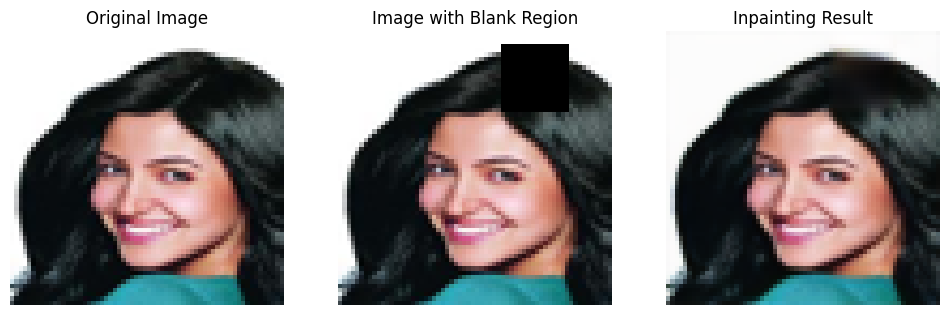

In [20]:
# Select a random image from the celebA dataset
random_idx = np.random.randint(0, celebA_images.shape[0])
image = celebA_images[random_idx]

# Create a blank region for the image
blank_size = 16
x = np.random.randint(0, image.shape[1] - blank_size)
y = np.random.randint(0, image.shape[0] - blank_size)
image_with_blank = np.copy(image)
image_with_blank[y:y+blank_size, x:x+blank_size] = 0.0

# Inpaint the image
inpainting_result = inpainting_model.predict(np.expand_dims(image_with_blank, axis=0))[0]

# Plot the original image, image with blank region, and the inpainting result
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(image_with_blank)
axes[1].set_title("Image with Blank Region")
axes[1].axis("off")
axes[2].imshow(inpainting_result)
axes[2].set_title("Inpainting Result")
axes[2].axis("off")
plt.show()


1/1 [==============================] - 0s 33ms/step


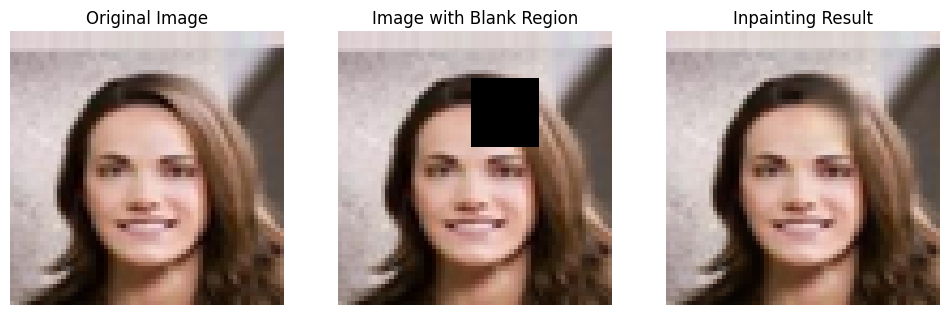

In [27]:
# Select a random image from the celebA dataset
random_idx = np.random.randint(0, celebA_images.shape[0])
image = celebA_images[random_idx]

# Create a blank region for the image
blank_size = 16
x = np.random.randint(0, image.shape[1] - blank_size)
y = np.random.randint(0, image.shape[0] - blank_size)
image_with_blank = np.copy(image)
image_with_blank[y:y+blank_size, x:x+blank_size] = 0.0

# Inpaint the image
inpainting_result = inpainting_model.predict(np.expand_dims(image_with_blank, axis=0))[0]

# Plot the original image, image with blank region, and the inpainting result
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(image_with_blank)
axes[1].set_title("Image with Blank Region")
axes[1].axis("off")
axes[2].imshow(inpainting_result)
axes[2].set_title("Inpainting Result")
axes[2].axis("off")
plt.show()


In [28]:
image = Image.open('/content/Test.jpg')
images = []
image = image.resize((128, 128))  # Resize the image to 64x64
image = np.array(image)
images.append(image)

# Normalize pixel values to the range [0, 1]
images = np.array(images).astype('float32') / 255.0
  # Define the inpainting model (U-Net architecture)


1/1 [==============================] - 0s 21ms/step


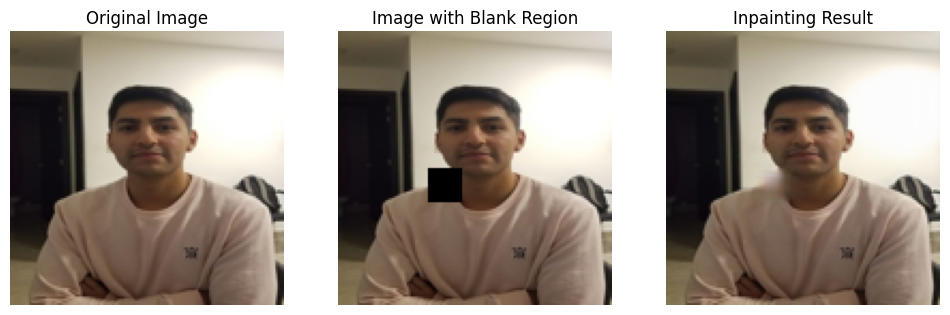

In [55]:
# Select a random image from the celebA dataset
image = images[0]

# Create a blank region for the image
blank_size = 16
x = np.random.randint(0, image.shape[1] - blank_size)
y = np.random.randint(0, image.shape[0] - blank_size)
image_with_blank = np.copy(image)
image_with_blank[y:y+blank_size, x:x+blank_size] = 0.0

# Inpaint the image
inpainting_result = inpainting_model.predict(np.expand_dims(image_with_blank, axis=0))[0]

# Plot the original image, image with blank region, and the inpainting result
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(image_with_blank)
axes[1].set_title("Image with Blank Region")
axes[1].axis("off")
axes[2].imshow(inpainting_result)
axes[2].set_title("Inpainting Result")
axes[2].axis("off")
plt.show()